<a href="https://colab.research.google.com/github/IlonaGA/hse_hw_2022/blob/main/HW_atacseq.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
! wget https://repo.anaconda.com/archive/Anaconda3-2022.10-Linux-x86_64.sh
!chmod +x Anaconda3-2022.10-Linux-x86_64.sh
!bash Anaconda3-2022.10-Linux-x86_64.sh -b -f -p /usr/local >/dev/null
! conda update -n base -c defaults conda --yes
import sys
sys.path.append('/usr/local/lib/python3.8/site-packages')

In [ ]:
!conda config --system --prepend channels bioconda 
!conda config --system --prepend channels conda-forge
!conda install -y nextflow \
nf-core >/dev/null
# ! conda config --add channels defaults
# ! conda config --add channels bioconda
# ! conda config --add channels conda-forge

In [ ]:
!nextflow -h

Usage: nextflow [options] COMMAND [arg...]

Options:
  -C
     Use the specified configuration file(s) overriding any defaults
  -D
     Set JVM properties
  -bg
     Execute nextflow in background
  -c, -config
     Add the specified file to configuration set
  -d, -dockerize
     Launch nextflow via Docker (experimental)
  -h
     Print this help
  -log
     Set nextflow log file path
  -q, -quiet
     Do not print information messages
  -syslog
     Send logs to syslog server (eg. localhost:514)
  -v, -version
     Print the program version

Commands:
  clean         Clean up project cache and work directories
  clone         Clone a project into a folder
  config        Print a project configuration
  console       Launch Nextflow interactive console
  drop          Delete the local copy of a project
  help          Print the usage help for a command
  info          Print project and system runtime information
  kuberun       Execute a workflow in a Kubernetes cluster (experimental

In [ ]:
from google.colab import drive
drive.mount('/googledrive')
! mkdir -p /googledrive/MyDrive/colabdrive
#! ln -s /googledrive/MyDrive/colabdrive .

Drive already mounted at /googledrive; to attempt to forcibly remount, call drive.mount("/googledrive", force_remount=True).


Суть: Используя ATAC-seq, анализируют положение фрагментов ДНК вокруг хромосом для Saccharomyces cerevisiae. Далее используется нуклеосомный анализ (NucleoATAC), который может определять вращательное и трансляционное положение нуклеосом.

Всего сэмплов в эксперименте 32, но osmotic stress из них 6, по 2 реплики каждого.

### Запуск nextflow

In [ ]:
! nextflow run nf-core/atacseq -profile test,conda --outdir /googledrive/MyDrive/colabdrive -resume 
# you probably need to add this flag for the second run --skip_consensus_peaks 

In [ ]:
! ls ../googledrive/MyDrive/colabdrive

bwa  fastqc  igv  multiqc  pipeline_info  trimgalore


Имя запуска: determined_allen

### Narrow Peaks
(на самом деле не работает)

In [ ]:
! nextflow run nf-core/atacseq -profile test,conda --outdir /googledrive/MyDrive/colabdrive -resume --narrow_peak --skip_consensus_peaks


*   Fraction of Reads in Peaks оказалась одинаковой для двух запусков (ниже - скриншот).
*  Самое большое покрытие у 12 хромосомы. У остальных оно сильно меньше.
* Размер нуклеосомы: 200 bp.

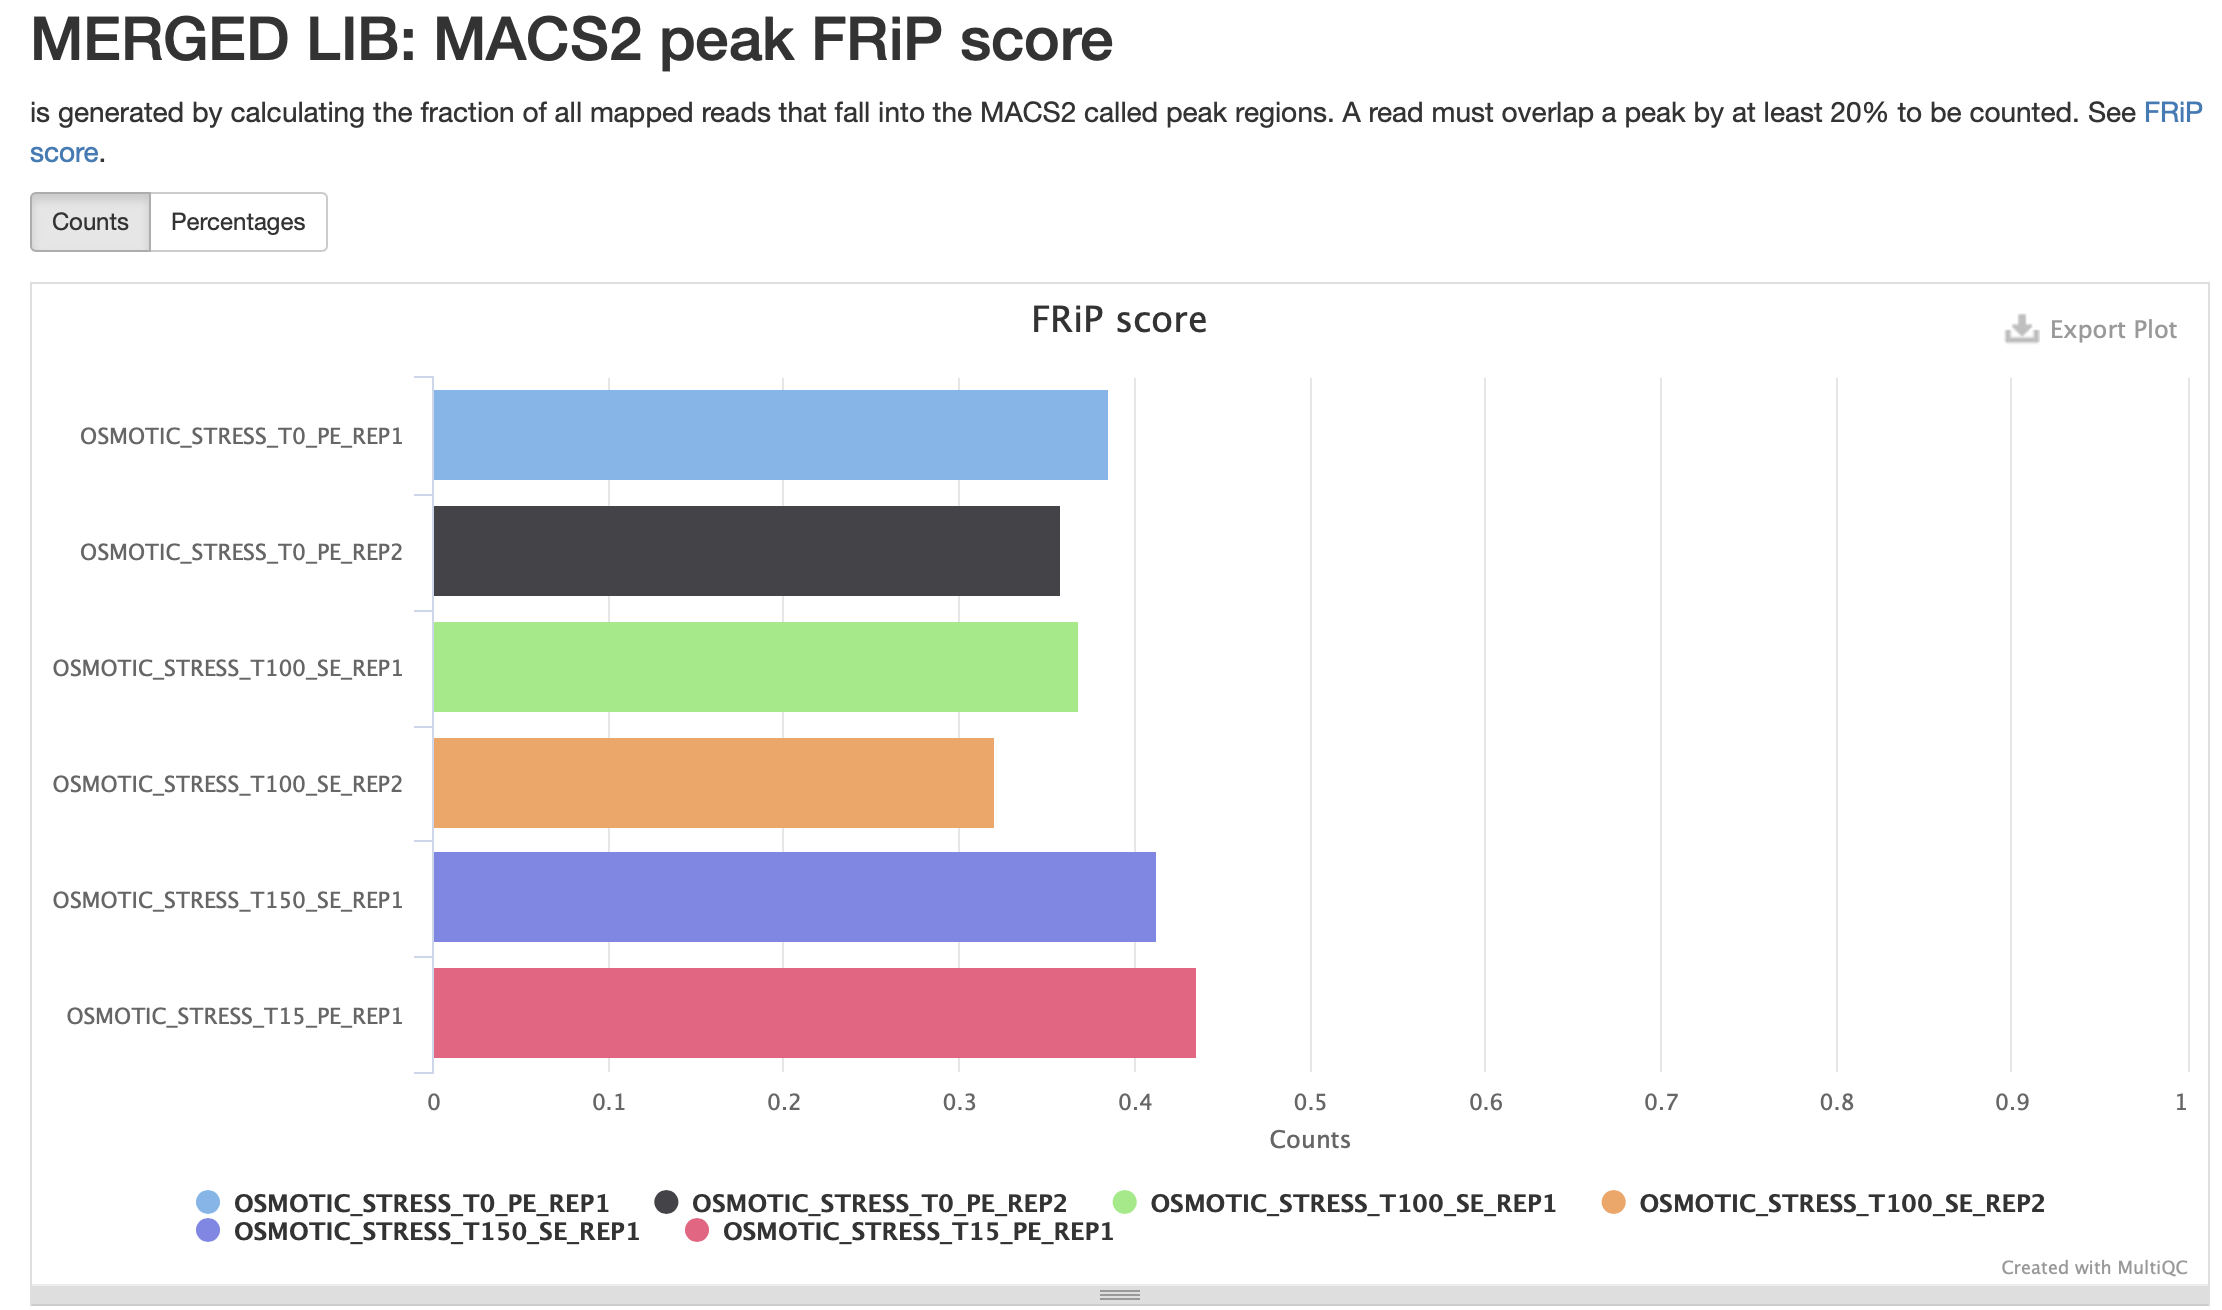

Нуклеосому, димер, тример, можно найти с помощью графика:
(тетрамер уже не виден, он должен быть примерно на 700-800)

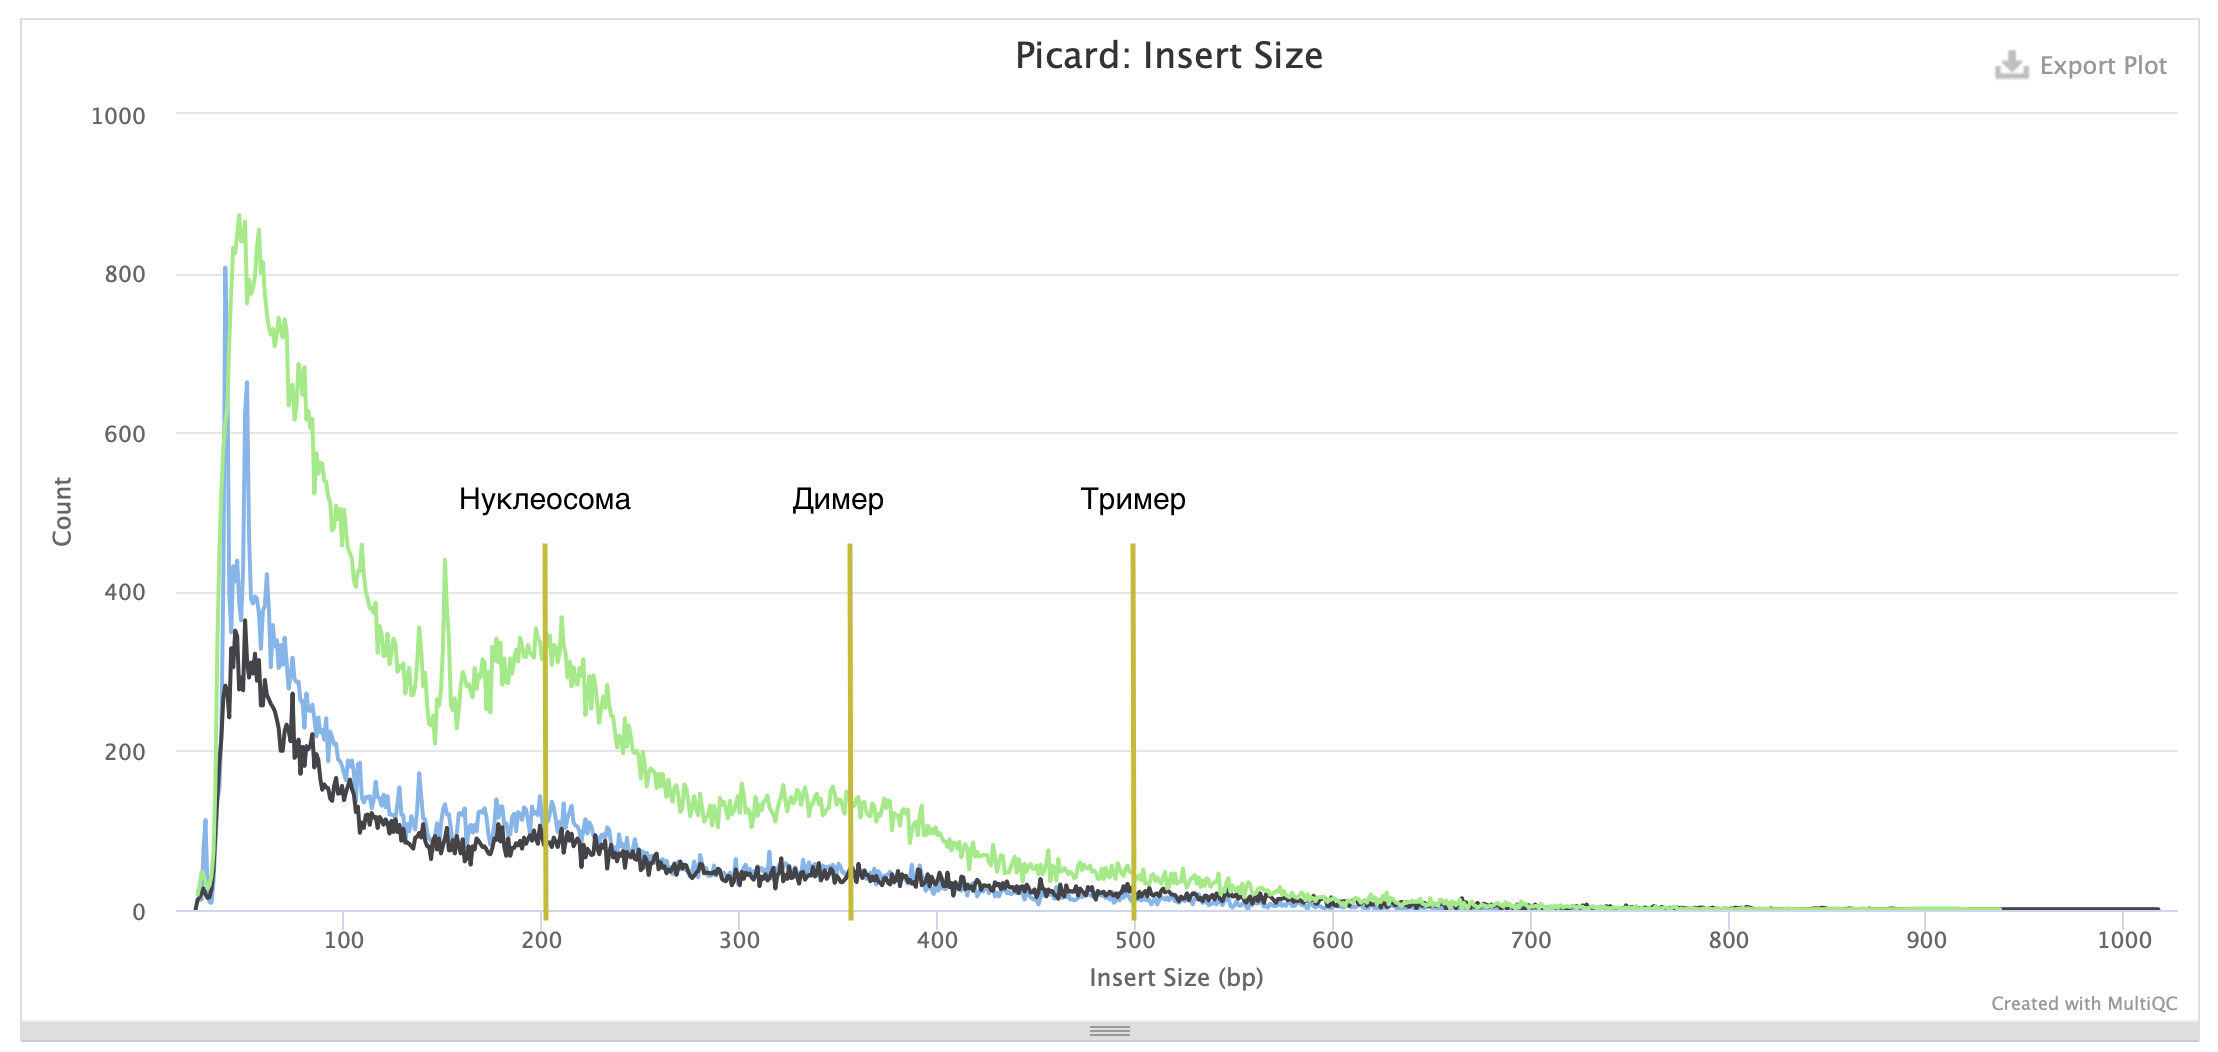

In [ ]:
#! cd /content/work/17/9a1446885acaa83916594d1b031989; sort -T '.' -k1,1 -k2,2n OSMOTIC_STRESS_T0_PE_REP1.mLb.clN_peaks.broadPeak OSMOTIC_STRESS_T0_PE_REP2.mLb.clN_peaks.broadPeak OSMOTIC_STRESS_T100_SE_REP1.mLb.clN_peaks.broadPeak OSMOTIC_STRESS_T100_SE_REP2.mLb.clN_peaks.broadPeak OSMOTIC_STRESS_T150_SE_REP1.mLb.clN_peaks.broadPeak OSMOTIC_STRESS_T15_PE_REP1.mLb.clN_peaks.broadPeak \
#| mergeBed -c 2,3,4,5,6,7,8,9 -o collapse,collapse,collapse,collapse,collapse,collapse,collapse,collapse > consensus_peaks.mLb.clN.txt

/bin/bash: line 0: cd: /content/work/17/9a1446885acaa83916594d1b031989: No such file or directory
/bin/bash: mergeBed: command not found
sort: cannot read: OSMOTIC_STRESS_T0_PE_REP1.mLb.clN_peaks.broadPeak: No such file or directory


In [ ]:
#! ls colabdrive/bwa/merged_library/macs2/broad_peak/*.broadPeak

In [ ]:
! cat colabdrive/bwa/merged_library/macs2/broad_peak/OSMOTIC_STRESS_T0_PE_REP1.mLb.clN_peaks.broadPeak | head

I	68	623	OSMOTIC_STRESS_T0_PE_REP1.mLb.clN_peak_1	102	.	7.1939	13.3654	10.2896
I	20778	21067	OSMOTIC_STRESS_T0_PE_REP1.mLb.clN_peak_2	27	.	3.90209	4.74719	2.7484
I	32944	33161	OSMOTIC_STRESS_T0_PE_REP1.mLb.clN_peak_3	22	.	3.39996	4.15489	2.27923
I	34391	34702	OSMOTIC_STRESS_T0_PE_REP1.mLb.clN_peak_4	19	.	3.14169	3.69319	1.91836
I	45352	45913	OSMOTIC_STRESS_T0_PE_REP1.mLb.clN_peak_5	20	.	3.45124	3.94871	2.08057
I	58133	58790	OSMOTIC_STRESS_T0_PE_REP1.mLb.clN_peak_6	17	.	3.2177	3.55179	1.76429
I	68171	68672	OSMOTIC_STRESS_T0_PE_REP1.mLb.clN_peak_7	31	.	3.53061	5.21571	3.16686
I	70968	71291	OSMOTIC_STRESS_T0_PE_REP1.mLb.clN_peak_8	20	.	2.95042	3.86593	2.05061
I	108836	109033	OSMOTIC_STRESS_T0_PE_REP1.mLb.clN_peak_9	14	.	3.02134	3.23303	1.49203
I	132149	132327	OSMOTIC_STRESS_T0_PE_REP1.mLb.clN_peak_10	13	.	2.94286	3.10751	1.39063


In [ ]:
import pandas as pd

df = pd.read_csv('colabdrive/bwa/merged_library/macs2/broad_peak/OSMOTIC_STRESS_T0_PE_REP1.mLb.clN_peaks.broadPeak', sep='\t', header=None)
df[0] = df[0].apply(lambda x: 'chromosome '+str(x))
df.to_csv('myfile.bed', sep='\t', index=None, header=None)

### Получение fasta файла

In [ ]:
! conda install bedtools

In [ ]:
! bedtools getfasta -fi GCF_000146045.2_R64_genomic_fixed.fna -bed myfile_fixed.bed -fo my_file.fa

index file GCF_000146045.2_R64_genomic_fixed.fna.fai not found, generating...


### Мотивы: 
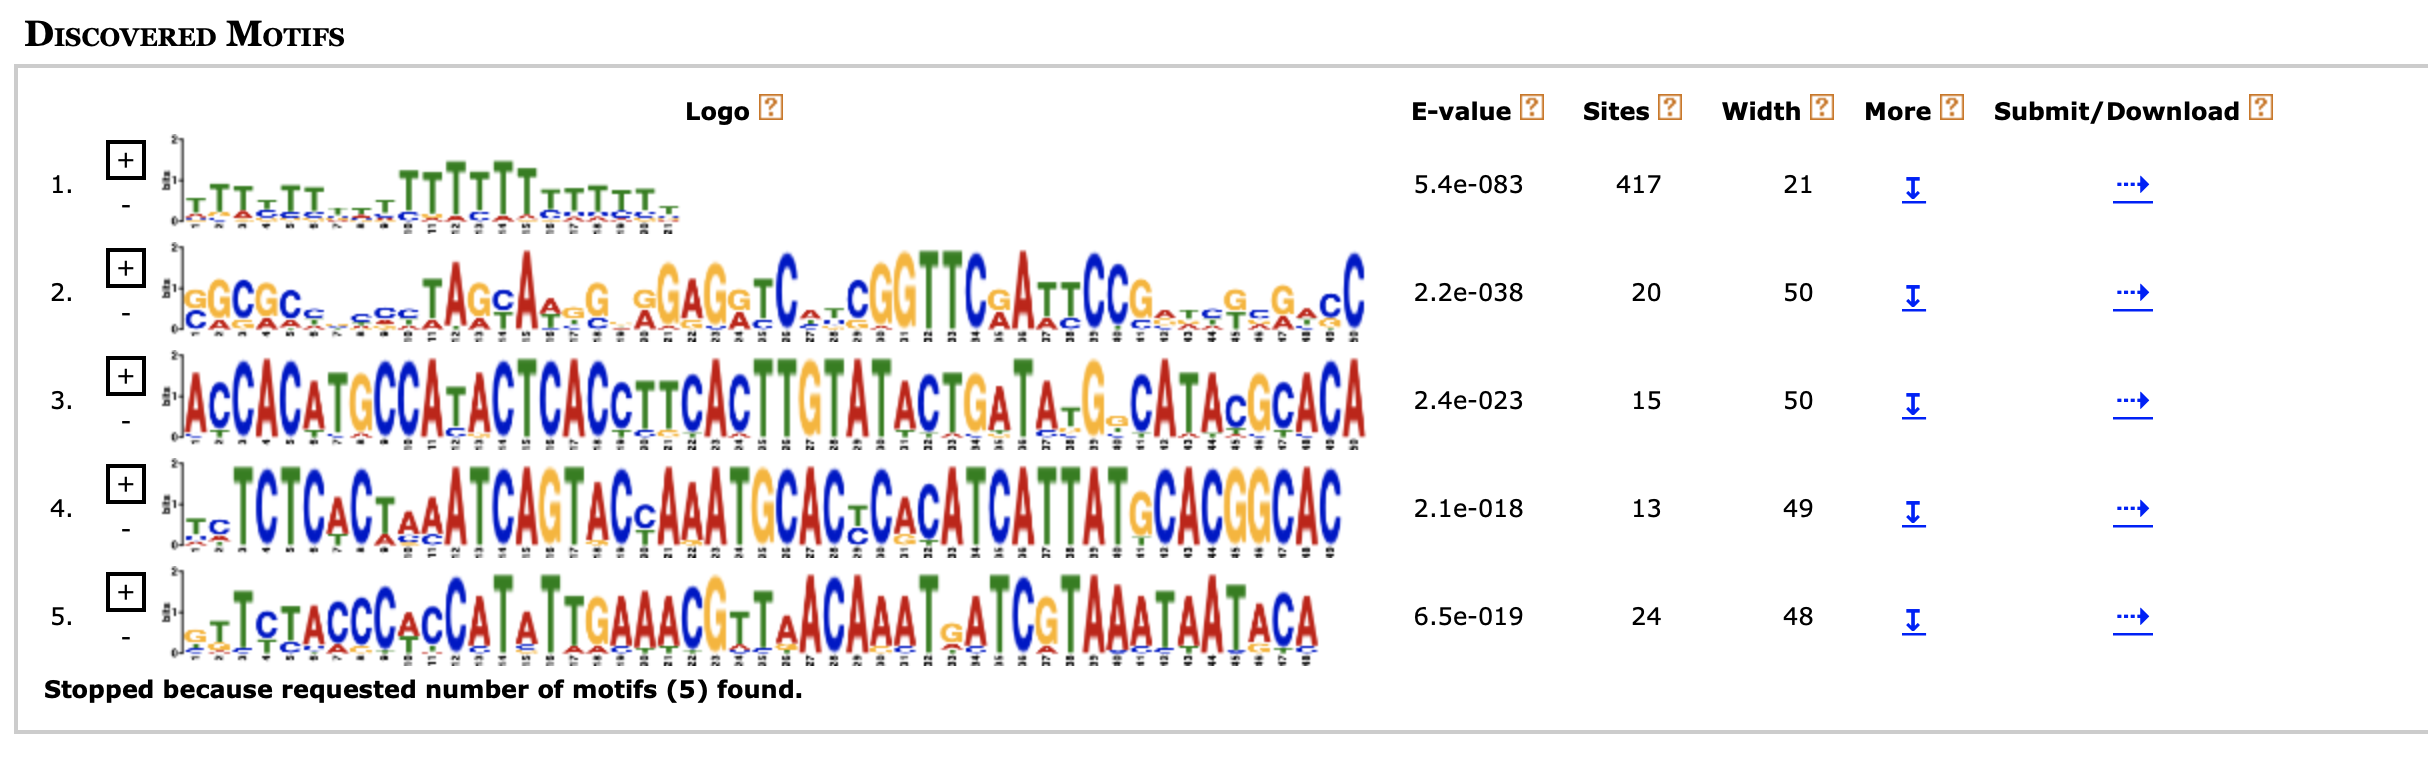

Мотивы (2-5) выглядят хорошо, находки статистически значимы.

Tomtom:

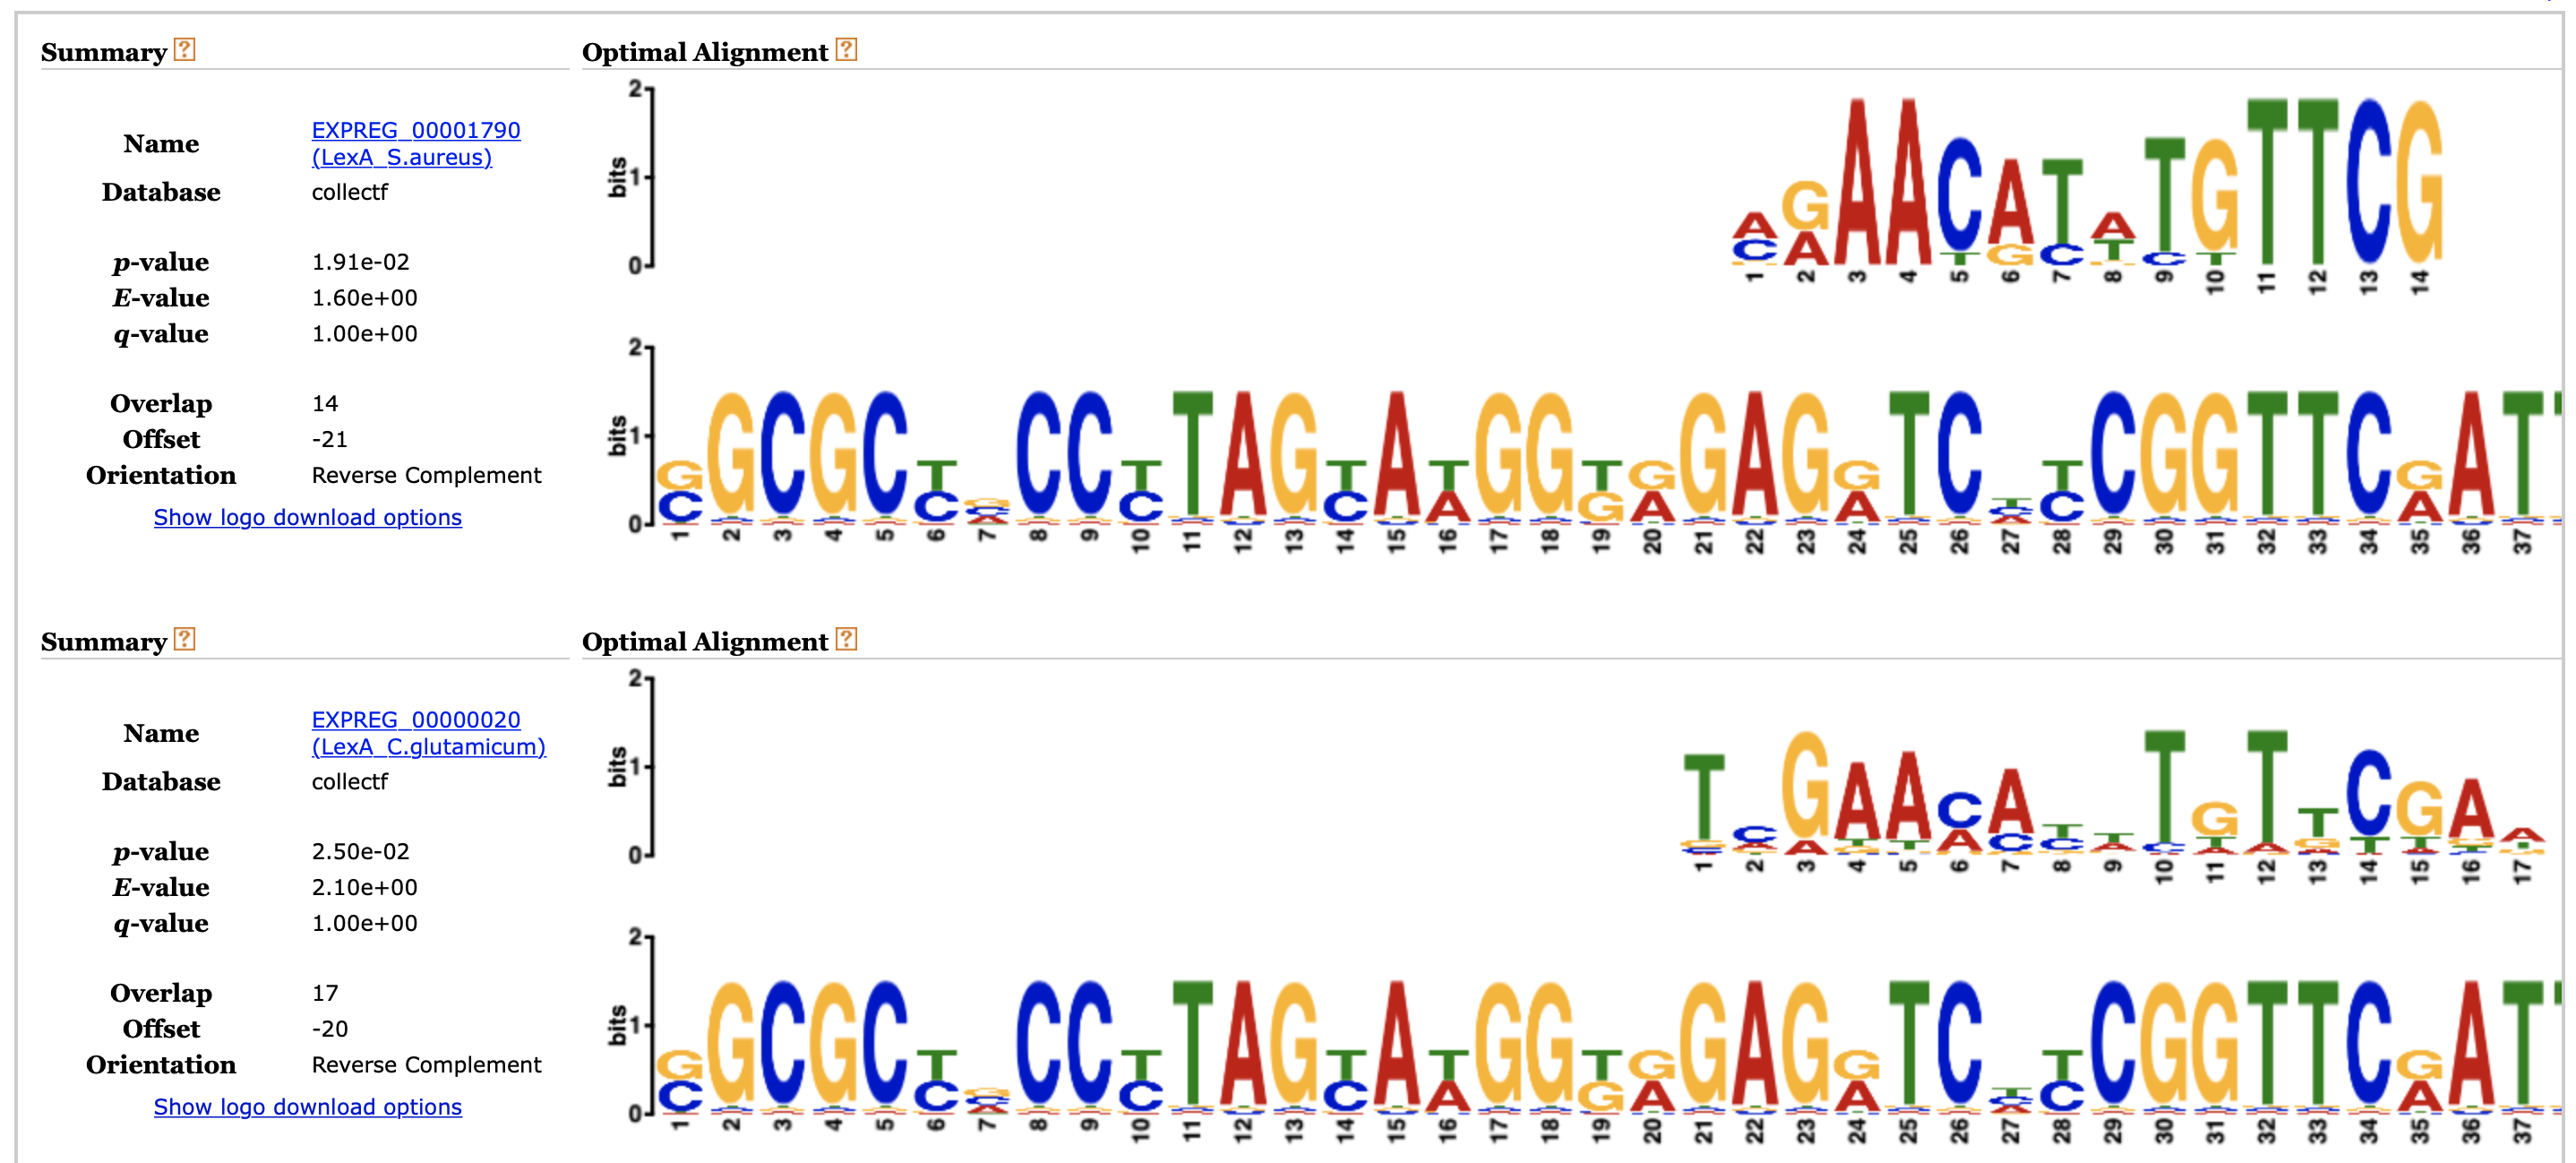

Находка статистически значима. Это траннскрипционный фактор LexA. Он представляет собой репрессор, который связывается с промоторными областями генов, регулирующих SOS-ответ.

Левый высокий пик - ДНК, совбодная от нуклеосомы (она меньше 143 нуклеотидов). Зазубрины возникают примерно раз в 10 нуклеотидов из-за витков (у транспозазы есть сродство к одной из бороздок). Правый пик - нуклеосома (мононуклеосомный регион), там есть нуклеосома и немного свободной ДНК.

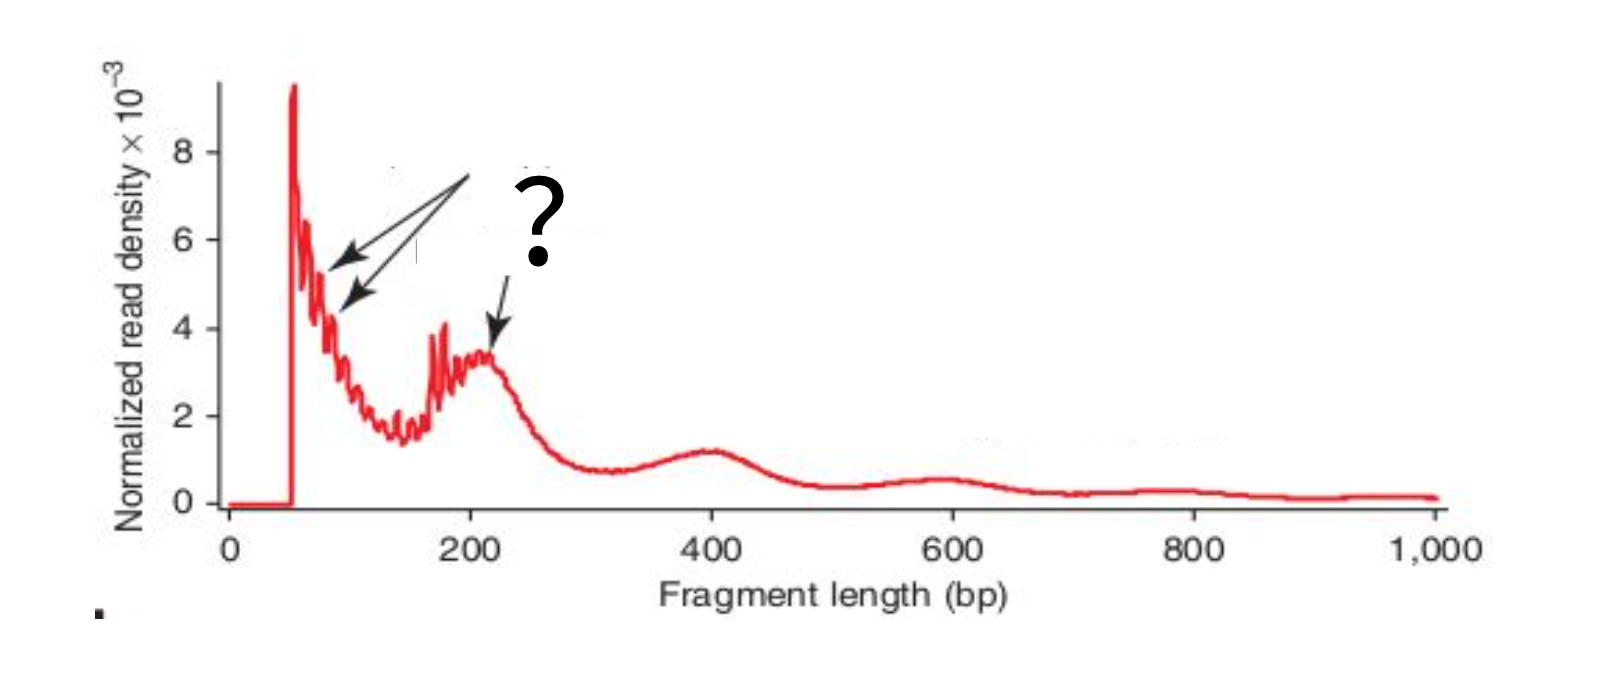